In [92]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl
from sklearn import linear_model
import seaborn as sns

import math


In [93]:
data = pd.read_csv("followers_top_final.csv")
data.shape

(129, 16)

In [94]:
data.head()

,ranking,username,categories,engagement,engagement_activity,followers,following,total_posts,channel_associated_on_bio,time_on_app_years,latest_post,post_type,likes_per_post,comments_per_post,partnership_posts,date_post
0,1,@anitta,"Art', 'Music', 'Singer'",0.7,4.435951,63300000,3019,5191,1,10,1,caroussel,546000,8557,1,9/11/2022
1,1,@anitta,"Art', 'Music', 'Singer'",0.7,4.435951,63300000,3019,5191,1,10,2,caroussel,1400000,14400,0,7/11/2022
2,1,@anitta,"Art', 'Music', 'Singer'",0.7,4.435951,63300000,3019,5191,1,10,3,caroussel,829000,10000,1,5/11/2022
3,2,@whinderssonnunes,"Celebrity', 'Comedy', 'Comedian'",0.7,1.147392,58400000,1859,2785,0,9,1,video,9928,113,1,8/11/2022
4,2,@whinderssonnunes,"Celebrity', 'Comedy', 'Comedian'",0.7,1.147392,58400000,1859,2785,0,9,2,video,632000,5379,0,7/11/2022


In [95]:
data.dtypes


ranking                        int64
username                      object
categories                    object
engagement                   float64
engagement_activity          float64
followers                      int64
following                      int64
total_posts                    int64
channel_associated_on_bio      int64
time_on_app_years              int64
latest_post                    int64
post_type                     object
likes_per_post                 int64
comments_per_post              int64
partnership_posts              int64
date_post                     object
dtype: object

In [96]:
print(data["engagement_activity"].max())
print(data["engagement_activity"].min())
print(data["engagement_activity"].mean())
print(data["engagement_activity"].median())

21.46753247
0.258636816
5.894679660279073
4.037955414


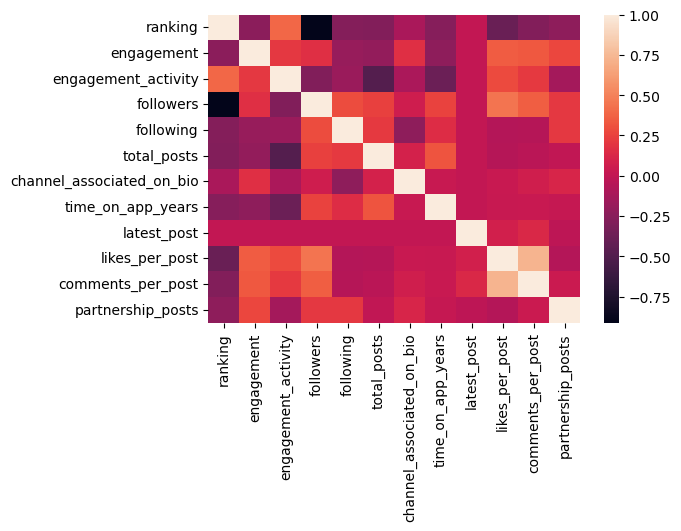

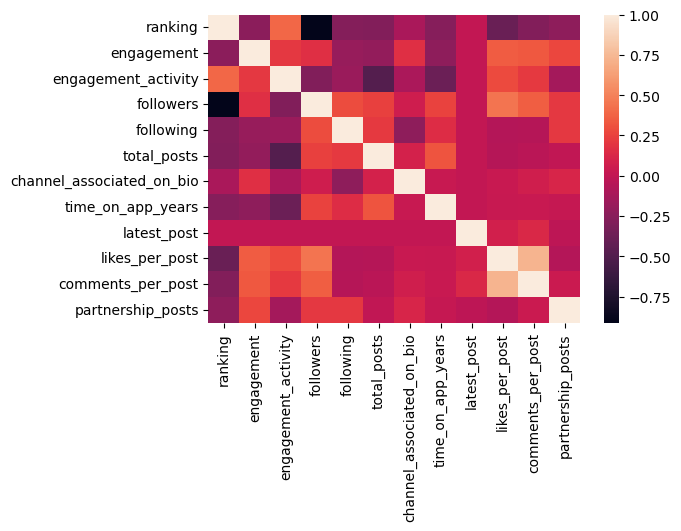

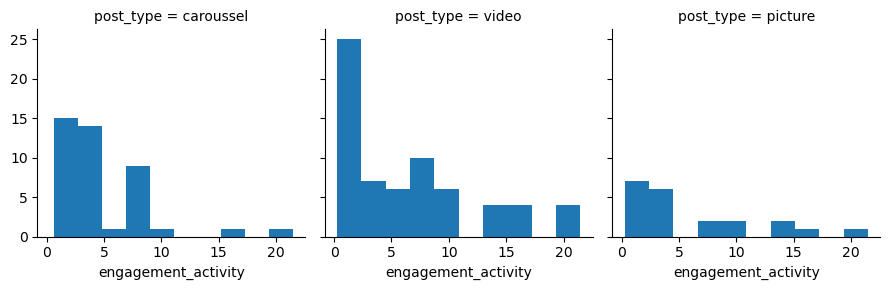

In [97]:
graph2 = sns.FacetGrid(data, col='post_type')
graph2.map(plt.hist, 'engagement_activity')
plt.show()

c:\Users\Cristiana\anaconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


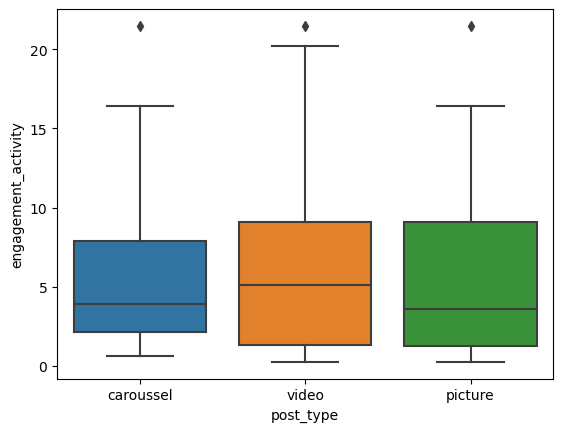

In [98]:
sns.boxplot(data.post_type, data.engagement_activity)
plt.show()

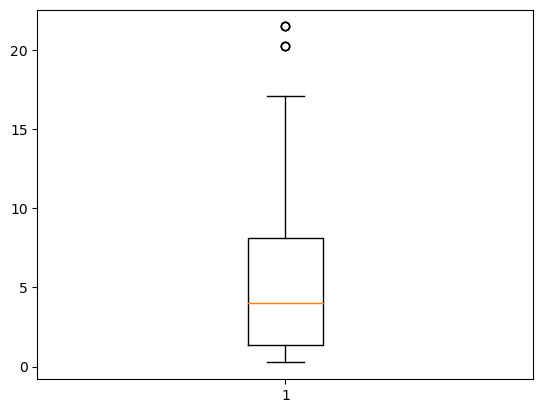

In [99]:
plt.boxplot(data.engagement_activity)
plt.show()

c:\Users\Cristiana\anaconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


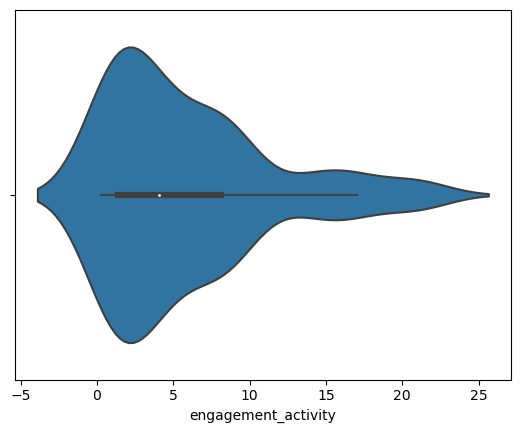

In [100]:
sns.violinplot(data.engagement_activity)
plt.show()

In [101]:
# average_comments_per_post = data.pivot_table(index=["ranking", "username"], values=["comments_per_post"], aggfunc= {"comments_per_post" : ["sum", "mean", "median", "min", "max"]})
# average_comments_per_post
# average_comments_per_post
# # create new columns then

In [102]:
# average_comments_per_post.columns

In [103]:
# average_comments_per_post.columns = average_comments_per_post.columns.droplevel()

In [104]:
# average_comments_per_post.columns = ["max_comment", "mean_comment", "median_comment", "min_comment", "sum_comment"]

In [105]:
# average_comments_per_post.loc[1]["sum_comment"]

In [106]:
data.skew()

C:\Users\Cristiana\AppData\Local\Temp\ipykernel_3208\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


ranking                      0.000000
engagement                   2.584288
engagement_activity          1.273515
followers                    1.072294
following                    0.837986
total_posts                  1.395286
channel_associated_on_bio   -0.141527
time_on_app_years           -0.864870
latest_post                  0.000000
likes_per_post               3.753744
comments_per_post            4.176843
partnership_posts            0.753224
dtype: float64

c:\Users\Cristiana\anaconda3\envs\ironhack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


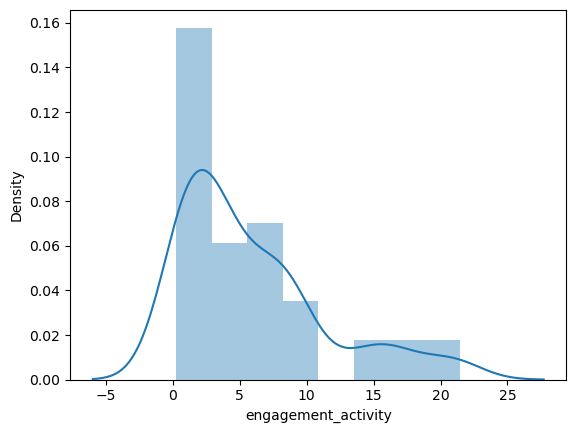

In [107]:
sns.distplot(data["engagement_activity"])
plt.show()

In [108]:
data.select_dtypes('number').head(5)

,ranking,engagement,engagement_activity,followers,following,total_posts,channel_associated_on_bio,time_on_app_years,latest_post,likes_per_post,comments_per_post,partnership_posts
0,1,0.7,4.435951,63300000,3019,5191,1,10,1,546000,8557,1
1,1,0.7,4.435951,63300000,3019,5191,1,10,2,1400000,14400,0
2,1,0.7,4.435951,63300000,3019,5191,1,10,3,829000,10000,1
3,2,0.7,1.147392,58400000,1859,2785,0,9,1,9928,113,1
4,2,0.7,1.147392,58400000,1859,2785,0,9,2,632000,5379,0


In [109]:
data[["engagement_activity", "followers", "following", "total_posts", "channel_associated_on_bio", "time_on_app_years", "likes_per_post", "comments_per_post", "partnership_posts"]].corr()


,engagement_activity,followers,following,total_posts,channel_associated_on_bio,time_on_app_years,likes_per_post,comments_per_post,partnership_posts
engagement_activity,1.000000,-0.285031,-0.179089,-0.487967,-0.104459,-0.387970,0.276438,0.211073,-0.127571
followers,-0.285031,1.000000,0.290567,0.242326,0.066646,0.249848,0.444603,0.352503,0.206761
following,-0.179089,0.290567,1.000000,0.210768,-0.225170,0.152762,-0.060733,-0.057095,0.202052
total_posts,-0.487967,0.242326,0.210768,1.000000,0.090002,0.313450,-0.053209,-0.034745,-0.004454
channel_associated_on_bio,-0.104459,0.066646,-0.225170,0.090002,1.000000,0.025752,0.034579,0.070078,0.117241
time_on_app_years,-0.387970,0.249848,0.152762,0.313450,0.025752,1.000000,0.027209,0.034241,0.015524
likes_per_post,0.276438,0.444603,-0.060733,-0.053209,0.034579,0.027209,1.000000,0.724105,-0.066592
comments_per_post,0.211073,0.352503,-0.057095,-0.034745,0.070078,0.034241,0.724105,1.000000,0.037334
partnership_posts,-0.127571,0.206761,0.202052,-0.004454,0.117241,0.015524,-0.066592,0.037334,1.000000


In [110]:
# plt.figure(figsize=[6,4])
# sns.heatmap(data.corr())

In [111]:
print(data["engagement_activity"].max())
print(data["engagement_activity"].min())
print(data["engagement_activity"].mean())
print(data["engagement_activity"].median())

21.46753247
0.258636816
5.894679660279073
4.037955414


In [112]:
def type_engage(value):
    if (value > 0.0) & (value <= 5.0):
        return "Low Engagement"
    elif (value > 5.0):
        return "High Engagement"
    else: 
        return "Error"

In [113]:
type_engage(48)

'High Engagement'

In [114]:
data['engagement_type'] = data['engagement_activity'].apply(type_engage)
data['engagement_type']

0       Low Engagement
1       Low Engagement
2       Low Engagement
3       Low Engagement
4       Low Engagement
            ...       
124    High Engagement
125    High Engagement
126    High Engagement
127    High Engagement
128    High Engagement
Name: engagement_type, Length: 129, dtype: object

In [115]:
data['engagement_type'].value_counts()

Low Engagement     75
High Engagement    54
Name: engagement_type, dtype: int64

In [116]:
data.tail()

,ranking,username,categories,engagement,engagement_activity,followers,following,total_posts,channel_associated_on_bio,time_on_app_years,latest_post,post_type,likes_per_post,comments_per_post,partnership_posts,date_post,engagement_type
124,42,@xandecoelho,"Lifestyle', 'Business'",0.0,21.467532,15400,1391,194,0,0,2,picture,873,39,0,28/8/2022,High Engagement
125,42,@xandecoelho,"Lifestyle', 'Business'",0.0,21.467532,15400,1391,194,0,0,3,caroussel,652,33,0,11/8/2022,High Engagement
126,43,@leopeleja,"Humor', 'Comedy', 'Marketing and Advertising',...",0.0,9.063368,7922,1211,1873,0,11,1,video,190,36,0,19/10/2022,High Engagement
127,43,@leopeleja,"Humor', 'Comedy', 'Marketing and Advertising',...",0.0,9.063368,7922,1211,1873,0,11,2,picture,232,13,0,13/10/2022,High Engagement
128,43,@leopeleja,"Humor', 'Comedy', 'Marketing and Advertising',...",0.0,9.063368,7922,1211,1873,0,11,3,video,217,30,0,7/10/2022,High Engagement


# Logistic Regression Model 

In [126]:
X = data[['engagement_activity','followers', 'following', 'total_posts', 'time_on_app_years', 'likes_per_post', 'comments_per_post']]
y = data['engagement_type']

# type of engagement will be generated by 2 bins based on : 
# from 0 to 5 : low engagement = 0 
# from 5 to 10 or higher : high engagement = 1 
# we will have to generate this new column 


X.head()

,engagement_activity,followers,following,total_posts,time_on_app_years,likes_per_post,comments_per_post
0,4.435951,63300000,3019,5191,10,546000,8557
1,4.435951,63300000,3019,5191,10,1400000,14400
2,4.435951,63300000,3019,5191,10,829000,10000
3,1.147392,58400000,1859,2785,9,9928,113
4,1.147392,58400000,1859,2785,9,632000,5379


In [127]:
#  create our model 

logistic = linear_model.LogisticRegression()

In [128]:
# train the model 

logistic.fit(X,y)

c:\Users\Cristiana\anaconda3\envs\ironhack\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [129]:
# evaluate the model 

logistic.score(X,y)

# accuracy score : near 89%

0.8837209302325582